<a href="https://colab.research.google.com/github/FahmeedMJM/hubspot_task/blob/main/task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Model Training and Evaluation**


**Introduction**


The objective of this project is to develop machine learning models to predict the target variable (Y1) using a provided dataset. The target variable (Y1) is influenced by nine factors (X1, X2, X3, X4, X5, X6, X7, X8, and X9). This report outlines the process of data preprocessing, training, and evaluating the performance of two machine learning models: Logistic Regression and Random Forest Classification. Through these steps, we aim to identify the most effective model for accurate prediction of the target variable.



**Load and explore the data set**

In [ ]:
import pandas as pd
dataset = pd.read_csv('prediction_dataset.csv')
print(dataset)

      X1      X2    X3   X4   X5   X6  X7   X8    X9  Y1
0     59  28.378  0.34  204  196  132  49   92  7.70   1
1     59  24.968     1  147  181  129  34   96  4.09   1
2     48  31.307  0.62  155  185  127  41  139  4.50   1
3     47  27.837  0.38  488  254  158  55  250  5.30   2
4     55  22.662  0.49   87  175  120  44   99  6.90   1
...   ..     ...   ...  ...  ...  ...  ..  ...   ...  ..
6962  44  26.879  0.38   94  244  164  61  101  3.10   1
6963  54  26.857  0.53   87  118   60  44  152  2.00   2
6964  36  29.142   1.6  154  194  129  35   95  3.50   1
6965  51  25.979  0.22  123  214  135  54   87  3.40   2
6966  53  22.311   1.9  393  289  169  64  131  4.40   2

[6967 rows x 10 columns]


**Summery of the data set**

In [ ]:
print(dataset.info())
print(dataset.describe())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6967 non-null   int64  
 1   X2      6967 non-null   float64
 2   X3      6967 non-null   object 
 3   X4      6967 non-null   int64  
 4   X5      6967 non-null   object 
 5   X6      6967 non-null   int64  
 6   X7      6967 non-null   int64  
 7   X8      6967 non-null   object 
 8   X9      6967 non-null   float64
 9   Y1      6967 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 544.4+ KB
None
                X1           X2           X4           X6           X7  \
count  6967.000000  6967.000000  6967.000000  6967.000000  6967.000000   
mean     53.331563    24.755782   143.837663   123.563370    51.443663   
std       8.715032     2.832407    90.900620    30.489776    12.437381   
min      21.000000     0.000000    31.000000    28.000000    16.000000   
25%      4

**Feature Engineering**

Data type Object turned to floar 64 to continue the process

In [ ]:
print(dataset['X3'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())
dataset['X3'] = pd.to_numeric(dataset['X3'], errors='coerce')
dataset['X3'] = dataset['X3'].astype(float)

print(dataset['X5'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())
dataset['X5'] = pd.to_numeric(dataset['X5'], errors='coerce')
dataset['X5'] = dataset['X5'].astype(float)

print(dataset['X8'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())
dataset['X8'] = pd.to_numeric(dataset['X8'], errors='coerce')
dataset['X8'] = dataset['X8'].astype(float)


print(dataset.dtypes)
print(dataset)


58
1
1
X1      int64
X2    float64
X3    float64
X4      int64
X5    float64
X6      int64
X7      int64
X8    float64
X9    float64
Y1      int64
dtype: object
      X1      X2    X3   X4     X5   X6  X7     X8    X9  Y1
0     59  28.378  0.34  204  196.0  132  49   92.0  7.70   1
1     59  24.968  1.00  147  181.0  129  34   96.0  4.09   1
2     48  31.307  0.62  155  185.0  127  41  139.0  4.50   1
3     47  27.837  0.38  488  254.0  158  55  250.0  5.30   2
4     55  22.662  0.49   87  175.0  120  44   99.0  6.90   1
...   ..     ...   ...  ...    ...  ...  ..    ...   ...  ..
6962  44  26.879  0.38   94  244.0  164  61  101.0  3.10   1
6963  54  26.857  0.53   87  118.0   60  44  152.0  2.00   2
6964  36  29.142  1.60  154  194.0  129  35   95.0  3.50   1
6965  51  25.979  0.22  123  214.0  135  54   87.0  3.40   2
6966  53  22.311  1.90  393  289.0  169  64  131.0  4.40   2

[6967 rows x 10 columns]


**Dropping Non values**

In [ ]:
dataset.dropna(inplace=True)
print(dataset)

      X1      X2    X3   X4     X5   X6  X7     X8    X9  Y1
0     59  28.378  0.34  204  196.0  132  49   92.0  7.70   1
1     59  24.968  1.00  147  181.0  129  34   96.0  4.09   1
2     48  31.307  0.62  155  185.0  127  41  139.0  4.50   1
3     47  27.837  0.38  488  254.0  158  55  250.0  5.30   2
4     55  22.662  0.49   87  175.0  120  44   99.0  6.90   1
...   ..     ...   ...  ...    ...  ...  ..    ...   ...  ..
6962  44  26.879  0.38   94  244.0  164  61  101.0  3.10   1
6963  54  26.857  0.53   87  118.0   60  44  152.0  2.00   2
6964  36  29.142  1.60  154  194.0  129  35   95.0  3.50   1
6965  51  25.979  0.22  123  214.0  135  54   87.0  3.40   2
6966  53  22.311  1.90  393  289.0  169  64  131.0  4.40   2

[6909 rows x 10 columns]


**standedization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = dataset.drop('Y1', axis=1)
features_scaled = scaler.fit_transform(features)

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','X7', 'X8', 'X9' ]
X = dataset[features]
y = dataset['Y1']
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['Y1'], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5527, 10)
X_test shape: (1382, 10)
y_train shape: (5527,)
y_test shape: (1382,)


**Train the Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

**Checking the Accuracy**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_test, y_pred1)
accuracy_rf = accuracy_score(y_test, y_pred2)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

print("Logistic Regression:\n", classification_report(y_test, y_pred1))
print("Random Forest:\n", classification_report(y_test, y_pred2))

import matplotlib.pyplot as plt

def plot_predicted_vs_actual(y_test, y_pred1):
    plt.figure(figsize=(8, 8))
    plt.plot(range(len(y_test)), y_test, label='Actual Values', linestyle='-', color='blue')
    plt.plot(range(len(y_pred1)), y_pred1, label='Predicted Values', linestyle='--', color='red')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()


Accuracy of Logistic Regression: 1.0
Accuracy of Random Forest Classifier: 1.0
Logistic Regression:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       763
           2       1.00      1.00      1.00       619

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       763
           2       1.00      1.00      1.00       619

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



**Graphing the prediction of two models in a confusion Matrix**

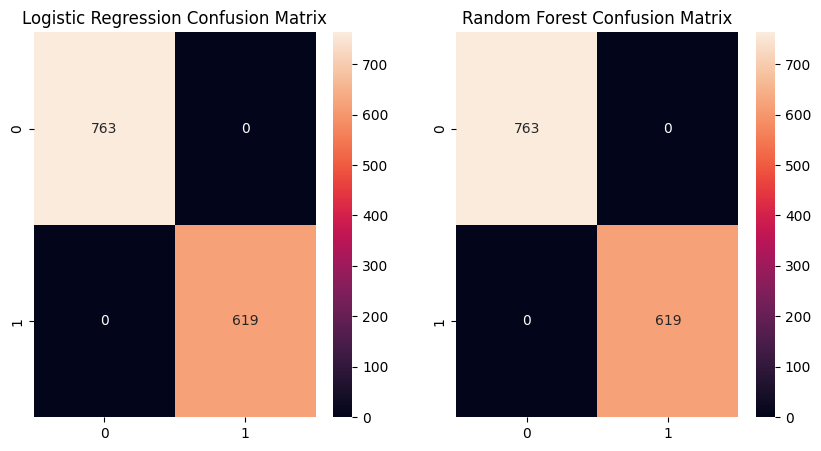

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')

plt.show()


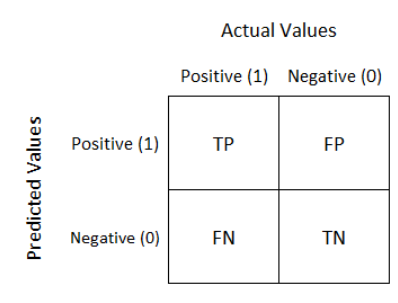

According to the above graph and details the accuracy of both models are same.the confusion matrix reveals a balanced distribution of true positives, true negatives, false positives, and false negatives, indicating consistent performance across the classes



**Problems**

**Reason for selecting Logistic Regression Model and Random Forest classifiers**

In our predictive modeling task, we chose Logistic Regression and Random Forest classifiers because they fit our dataset well and have useful strengths. Logistic Regression is simple and easy to understand, helping us see the relationship between features and the target variable. It also runs efficiently and works well with our balanced dataset. Random Forest handles complex patterns and avoids overfitting by using multiple decision trees. It works with different types of features without much preprocessing and shows which features are important.

Other models like Support Vector Machines, K-Nearest Neighbors, and Gradient Boosting Machines were less suitable due to issues with interpretability, efficiency, or needing a lot of tuning. Neural Networks were not necessary given our dataset size and problem complexity. Therefore, Logistic Regression and Random Forest were the best choices, balancing performance, clarity, and efficiency.